In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

## Uniaxis plots

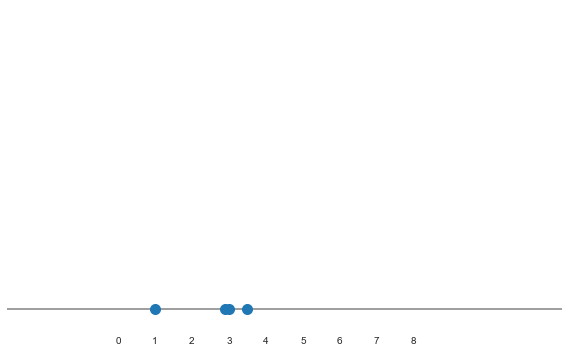

In [28]:
sns.set_style('white')
plt.figure(figsize =(8,5))
pts = [1,3,3.5,2.9] 
plt.scatter(pts, [0]*len(pts), s = 100, zorder = 1)
plt.axhline(0,color = 'grey', zorder = 0)
plt.ylim(-0.1, 1.5)
plt.xlim(-3,12)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout()

## Normal plots centered at each point

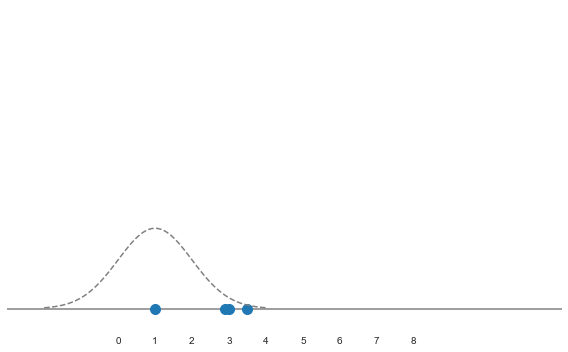

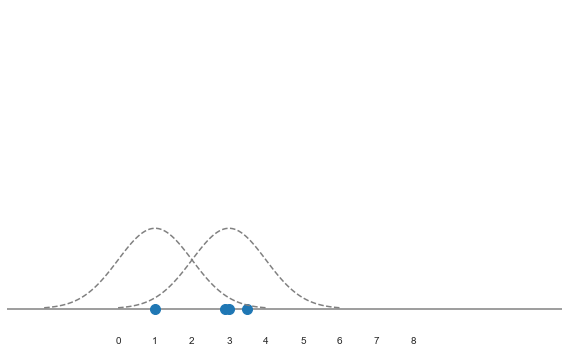

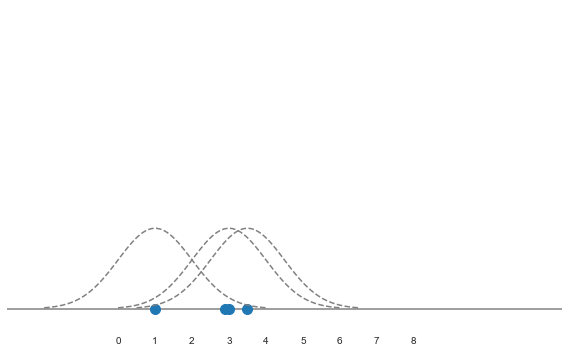

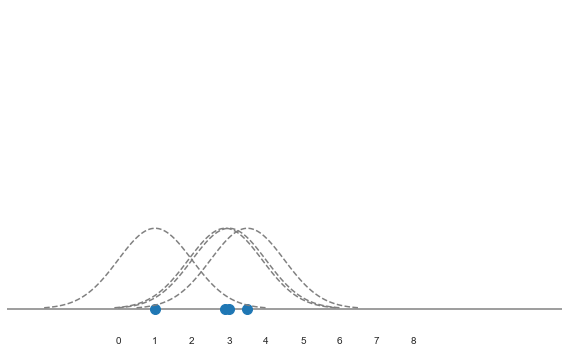

In [29]:
from scipy import stats
import numpy as np
for i in range(len(pts)):
    plt.figure(figsize=(8, 5))
    for point in pts[0:i+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();

## Normal distribution plots with mean and standard deviation

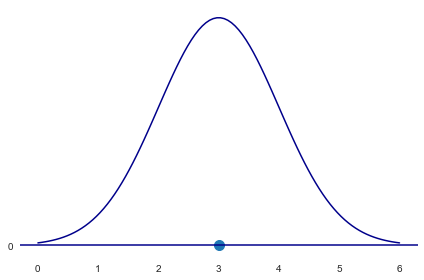

In [35]:
x = np.linspace(3 - 3*sigma, 3 + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, 3, 1), color = 'darkblue')
plt.box(False)
plt.yticks([0])
pt = [3]
plt.scatter(pt,y = [0]*len(pt),s = 100)
plt.axhline(color = 'darkblue')
plt.tight_layout()

## Adding Normal curves recursively 

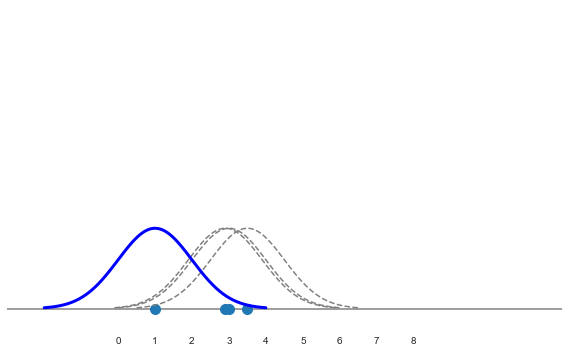

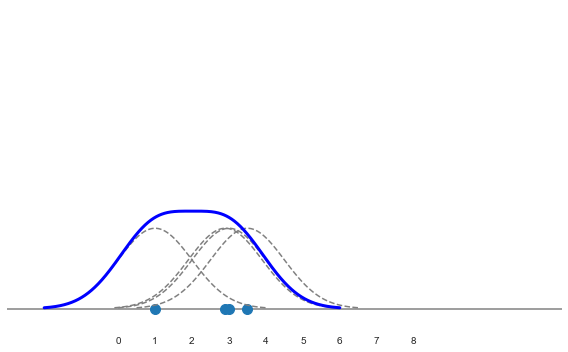

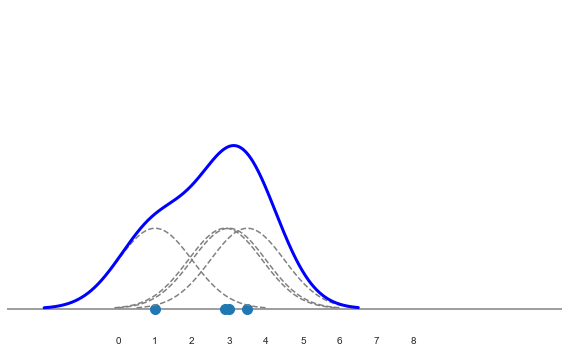

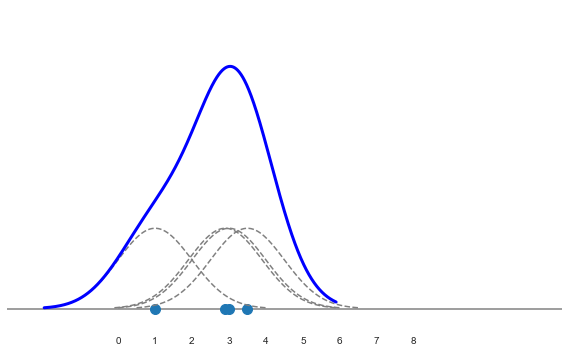

In [40]:
for i in range(1, len(pts)+1):
    plt.figure(figsize=(8, 5))
    for point in pts[0:len(pts)+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)

    total_x = np.linspace(pts[0] - 3*sigma, pts[i-1] + 3*sigma, 1000)
    total = sum([stats.norm.pdf(total_x, pts[j], sigma) for j in range(i)])
    plt.plot(total_x, total, color="blue", lw=3)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();

## Final combined distribution

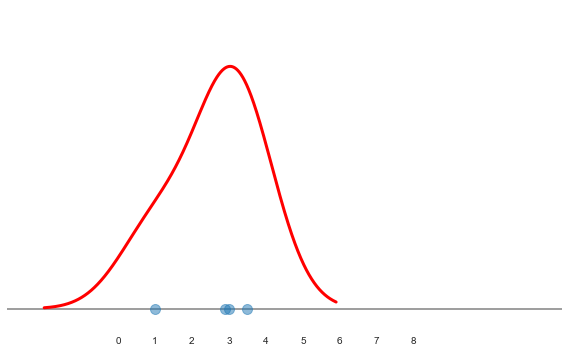

In [42]:
plt.figure(figsize=(8,5))
plt.plot(total_x, total, color="red", lw=3)
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, alpha=0.5)
plt.axhline(0, color='gray', zorder=0)
plt.xlim(-3, 12)
plt.ylim(-0.1, 1.5)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

## Creating cosine kernel

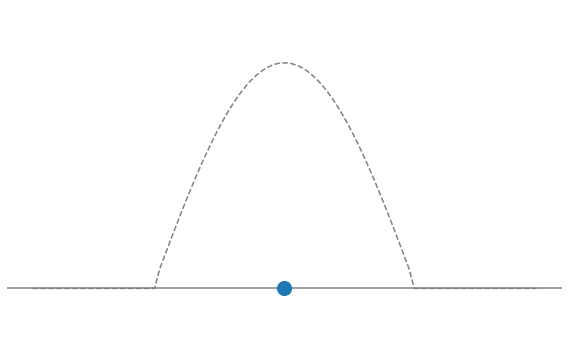

In [45]:
plt.figure(figsize=(8, 5))

def build_cos_kernel(x, center=0, sigma=1):
    if np.abs(x - center) < sigma:
        return 0.4*np.cos(x-center)
    else:
        return 0  

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_cos_kernel(val, center=mu, sigma=1.5) for val in x], 
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

## Traingular kernel

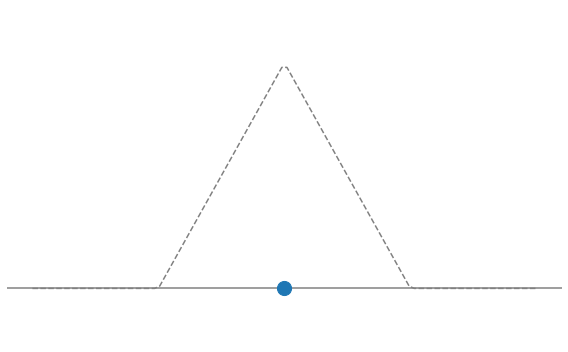

In [44]:
plt.figure(figsize=(8, 5))

def build_tri_kernel(x, center=0, sigma=1):
    m = 0.4/sigma
    if x < (center-sigma):
        return 0
    elif x < center:
        return m*x + m*(sigma-center)
    elif x < (center+sigma):
        return -m*x + m*(sigma + center)
    else:
        return 0  

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_tri_kernel(val, center=mu, sigma=1.5) for val in x], 
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();